Mounted at /content/drive
Görüntü Boyutları (Row, Column, Channels): (400, 400, 3)
Görüntü Veri Tipi: uint8


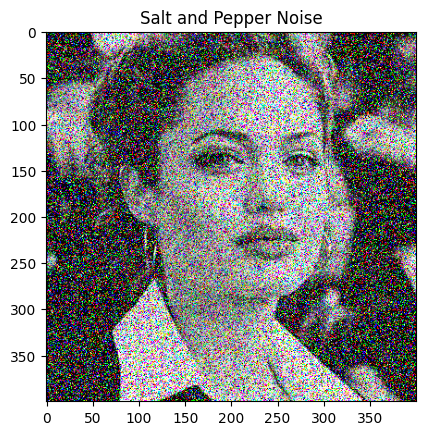

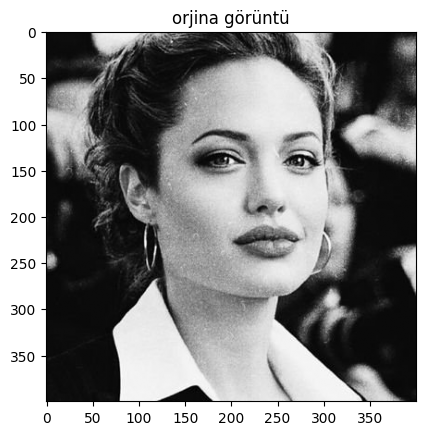

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

# Google Drive'ı /content/drive altına bağla
drive.mount('/content/drive')

def saltPepperNoise(image, s_vs_p=0.5, amount=0.5):
    row, col, ch = image.shape
    noisy = np.copy(image)

    # Tuz gürültüsü
    num_salt = np.ceil(amount * image.size * s_vs_p).astype(int)
    coords_salt = [np.random.randint(0, high=i, size=num_salt) for i in image.shape]
    noisy[tuple(coords_salt)] = 1

    # Biber gürültüsü
    num_pepper = np.ceil(amount * image.size * (1.0 - s_vs_p)).astype(int)
    coords_pepper = [np.random.randint(0, high=i, size=num_pepper) for i in image.shape]
    noisy[tuple(coords_pepper)] = 0

    return noisy


# Örnek bir resim yükleyelim
img_url = '/content/drive/MyDrive/GoruntuIsleme/images/angelina.jpg'
img = cv2.imread(img_url)

# Görüntü özelliklerini görüntüle
print("Görüntü Boyutları (Row, Column, Channels):", img.shape)
print("Görüntü Veri Tipi:", img.dtype)

# Resmi normalleştir
img = img / 255.0

# Gürültü ekleyin
noise_img = saltPepperNoise(img)

# Gürültü eklenmiş resmi göster
plt.imshow(noise_img)
plt.title("Salt and Pepper Noise")
plt.show()

# orjinal resmi göster
plt.imshow(img)
plt.title("orjina görüntü")
plt.show()
